# k-Means Clustering – Iris Dataset (Unsupervised Learning)

**Ziel:**
Wir clustern den Iris-Datensatz mit **k-Means** (ohne Labels `y`) und bewerten die Qualität
mit dem **Silhouette Score**. Optional visualisieren wir die Cluster mit **PCA**.

**Schritte:**
1. Daten laden (nur X)
2. Feature Scaling (wichtig für Distanz-basierte Methoden)
3. k-Means trainieren
4. Cluster-Labels ausgeben
5. Silhouette Score berechnen
6. (Optional) PCA-Plot


In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = datasets.load_iris()
X = iris.data

print ("X shape : ", X.shape)

X shape :  (150, 4)


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled mean (approx):", X_scaled.mean(axis=0))
print("Scaled std (approx):", X_scaled.std(axis=0))

Scaled mean (approx): [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Scaled std (approx): [1. 1. 1. 1.]


In [5]:
k=3
kmeans = KMeans(n_clusters=k, random_state=42 , n_init=10)
labels = kmeans.fit_predict(X_scaled)

print("Unique cluster labels: ", np.unique(labels))
print("Cluster counts", np.bincount(labels))

Unique cluster labels:  [0 1 2]
Cluster counts [53 50 47]


In [6]:
score = silhouette_score(X_scaled, labels)
print("Silhouette score: ", score)

Silhouette score:  0.45994823920518635


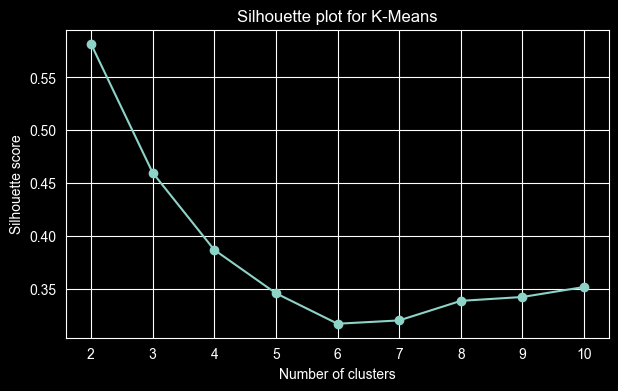

Best k:  2


In [8]:
ks = range(2,11)
score = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42 , n_init=10)
    lbl = km.fit_predict(X_scaled)
    score.append(silhouette_score(X_scaled, lbl))

plt.figure(figsize=(7,4))
plt.plot(list(ks),score,marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette plot for K-Means")

plt.show()

best_k = list(ks) [int(np.argmax(score))]
print("Best k: ", best_k)

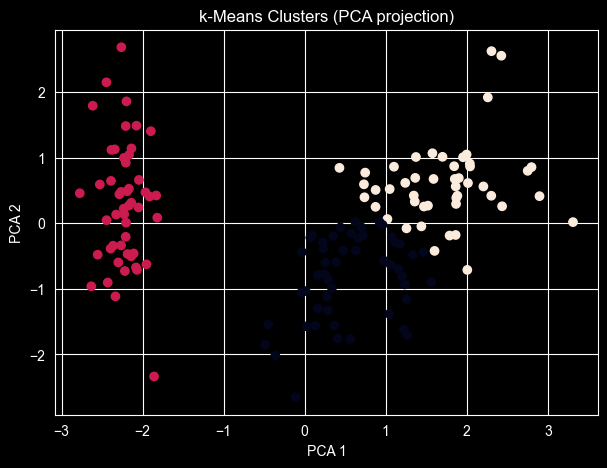

In [11]:
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("k-Means Clusters (PCA projection)")
plt.savefig("/Users/sadokamine/PycharmProjects/ml-foundations-project/notebooks/plots/kmeans_pca_clusters.png",dpi=150, bbox_inches='tight')
plt.show()


In [10]:
y_true = iris.target
df = pd.DataFrame({"cluster": labels, "true_label": y_true})
print(pd.crosstab(df["cluster"], df["true_label"]))


true_label   0   1   2
cluster               
0            0  39  14
1           50   0   0
2            0  11  36
